In [1]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
from helpers import plot_three_images, BirdsEye
import cv2

In [2]:
CSV_FILE = "./samples/logs.csv"
IMAGE_DIR = "./samples/many-images/"

# DATA.sample(frac=1) #shuffle
SOURCE_POINTS = [(0, 43), (130, 15), (190, 15), (320, 43)]
DEST_POINTS = [(130, 50), (130, 10), (190, 10), (190, 50)]
BIRDS_EYE = BirdsEye(SOURCE_POINTS, DEST_POINTS)
YSTART, YSTOP = 100, 166

In [3]:
DATA = pd.read_csv(CSV_FILE)
print(len(DATA))
DATA.head()

3613


,NAME,STEER
0,center_2018_09_07_21_12_24_282.jpg,0.0
1,center_2018_09_07_21_12_24_348.jpg,0.0
2,center_2018_09_07_21_12_24_415.jpg,0.0
3,center_2018_09_07_21_12_24_482.jpg,0.0
4,center_2018_09_07_21_12_24_549.jpg,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113c5f128>]],
      dtype=object)

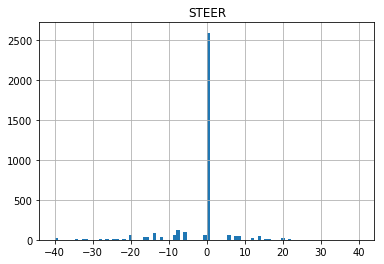

In [4]:
DATA.hist(bins=90)

In [5]:
print("STEER:", DATA['STEER'][500], ",", DATA['STEER'][3200], ",", DATA['STEER'][1])


STEER: 0.0 , -0.001597404 , 0.0


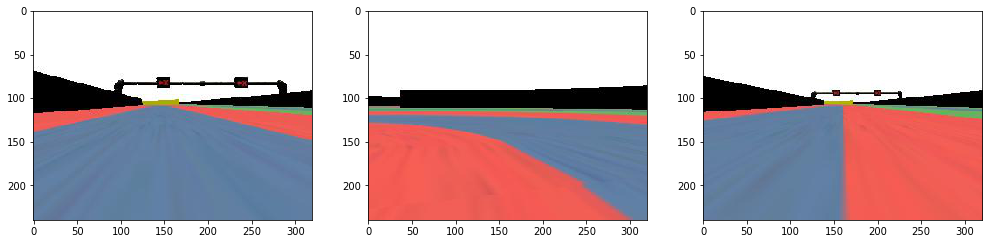

In [6]:
x = mpimg.imread(IMAGE_DIR + DATA['NAME'][500])
y = mpimg.imread(IMAGE_DIR + DATA['NAME'][3200])
z = mpimg.imread(IMAGE_DIR + DATA['NAME'][1])

plot_three_images(x, y, z, w =17, h=5)

In [7]:
def random_flip(image, steer):
    if np.random.random() > 0.5:
        return np.fliplr(image), -steer
    else:
        return image, steer

In [8]:
def get_processed_data(i, data):
    
    steer =  data['STEER'][i]
    unprocessed_img = mpimg.imread(IMAGE_DIR + data['NAME'][i])
    cropped_img = unprocessed_img[YSTART:YSTOP, :, :]
    sky_img = BIRDS_EYE.skyview(cropped_img)
    img = sky_img[:, 50: 250]
    cv2.cvtColor(sky_img, cv2.COLOR_RGB2YUV)
    return random_flip(img, steer)

0.0 , 0.001597404 , -0.0


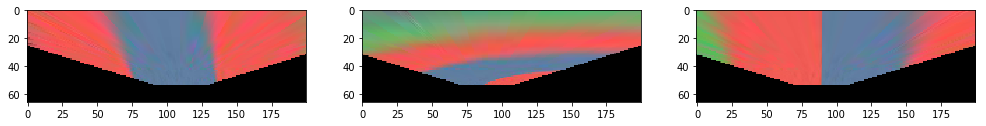

In [9]:
l, i = get_processed_data(500, DATA)
m, j = get_processed_data(3200, DATA)
n, k = get_processed_data(0, DATA)

plot_three_images(l, m, n, w =17, h=5)
print(i, ",", j, ",", k)